In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
np.random.seed(1000)

In [3]:
A = np.random.randn(1000,10)

In [4]:
x_ = np.zeros(10)
for i in range(10):
  if i % 2 == 0:
    x_[i] = np.random.uniform(-(i+2),-(i+1))
  else:
    x_[i] = np.random.uniform(i+1,i+2)

x_ = x_.reshape(10,1)

In [5]:
e = np.random.randn(1000,1)

In [6]:
y = np.add(np.matmul(A,x_),e)

In [7]:
def evalf(x1):
  res = ((np.linalg.norm(np.subtract(np.matmul(A,x1),y)))**2)/2
  return res

In [8]:
def evalg(x1):
  arr = np.zeros(10)
  err = np.subtract(np.matmul(A,x1),y)
  for i in range(10):
    arr[i] = np.matmul(err.transpose(),A[:,i])
  return arr.reshape(10,1)

In [9]:
def evalh(x1):
  hes = np.zeros((10,10))
  for i in range(10):
    for j in range(10):
      hes[i][j] = np.matmul(A[:,i],A[:,j])
  return hes

In [10]:
def compute_steplength_backtracking_scaled_direction(x, p, gradf, alpha_start, rho, gamma, d_k):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*np.matmul(d_k,p)) > evalf(x) + gamma*alpha*(np.matmul(gradf.transpose(),np.matmul(d_k,p))):
    alpha = rho*alpha

  return alpha

In [11]:
def Newton(n, tol, *args):
  xlist = []
  x = np.zeros(n).reshape(n,1)
  xlist.append(x)
  grad_f = evalg(x)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  hes_f = evalh(x)

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 10000:
    p = -grad_f
    d = np.linalg.inv(hes_f)
    step_length = compute_steplength_backtracking_scaled_direction(x, p, grad_f, alpha, rho, gamma, d)
    x = np.add(x, np.multiply(step_length, np.matmul(d,p)))
    xlist.append(x)
    k += 1 
    grad_f = evalg(x) 
    hes_f = evalh(x)
  return k, x, evalf(x), xlist

In [12]:
start_time = timer()
k, x, f, l = Newton(10, 1e-5, 0.99, 0.5, 0.5)
end_time = timer()
n_time = end_time - start_time

In [13]:
print(x_)
print(x)

[[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]
[[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]]


#Ans 2:


*   $x^* : [-1.04982253,  2.95189743, -3.34298192,  4.60956007, -5.71176195, 6.89877618, -7.62879358,  8.16821112, -9.22221199, 10.05669293]\\
\bar{x} : [-1.06258705,  2.94307072, -3.34150552,  4.58252615, -5.75947573, 6.93512469, -7.61893094,  8.16818187, -9.2179964 , 10.00022174]$

* The required plot is below.

* The required plot is below.

* We can observe from the plot and the quotient of the norm as given in notes that the convergence rate is Q-linear.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


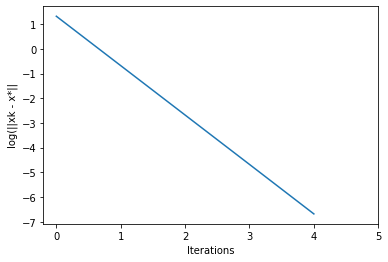

In [14]:
pl = []
for i in range(k+1):
  pl.append(np.log10(np.linalg.norm(np.subtract(l[i],x))))

kl = range(0,k+1)

plt.plot(kl,pl)
ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


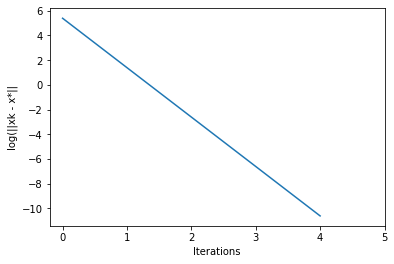

In [15]:
fl = []
for i in range(k+1):
  fl.append(np.log10(abs(evalf(l[i])-f)))

kl = range(0,k+1)

plt.plot(kl,fl)
ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show()

In [16]:
def compute_steplength_backtracking(x, gradf, B, alpha_start, rho, gamma):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*-np.matmul(B,gradf)) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),-np.matmul(B,gradf)):
    alpha = rho*alpha

  return alpha

In [17]:
def BFGS(n, tol, *args):
  xlist = []
  x1 = np.zeros(n).reshape(n,1)
  xlist.append(x1)
  grad_f = evalg(x1)

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  I = np.identity(n)

  B = I

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 3000:
    alpha = compute_steplength_backtracking(x1, grad_f, B, alpha_start, rho, gamma)
    x2 = np.add(x1, np.multiply(alpha,np.matmul(B,-grad_f)))
    s = x2 - x1
    y = evalg(x2) - evalg(x1)
    mu = 1/np.matmul(y.transpose(),s)
    #print(p,alpha,x2,s,y,mu)
    B = np.add(np.matmul(np.matmul(np.subtract(I,np.matmul(np.multiply(mu,s),y.transpose())),B),np.subtract(I,np.matmul(np.multiply(mu,y),s.transpose()))),np.matmul(np.multiply(mu,s),s.transpose()))
    x1 = x2
    xlist.append(x1)
    grad_f = evalg(x2)
    k = k+1
    #print(np.linalg.norm(grad_f))
  return k, xlist, x1, evalf(x1)

In [18]:
start_time = timer()
k, xl, x, f = BFGS(10, 1e-5, 0.99, 0.5, 0.5)
end_time = timer()
b_time = end_time - start_time

In [19]:
print(x_)
print(x)

[[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]
[[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]]


#Ans 3:


*   $x^* : [-1.04982253, 2.95189743, -3.34298192, 4.60956007, -5.71176195, 6.89877618, -7.62879358, 8.16821112, -9.22221199, 10.05669293]\\
\bar{x} : [-1.06258705,  2.94307072, -3.34150552,  4.58252615, -5.75947573, 6.93512469, -7.61893094,  8.16818187, -9.2179964 , 10.00022174]$

* The required plot is below.

* The required plot is below.

* We can observe from the plot and the quotient of the norm as given in notes that the convergence rate is Q-linear.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


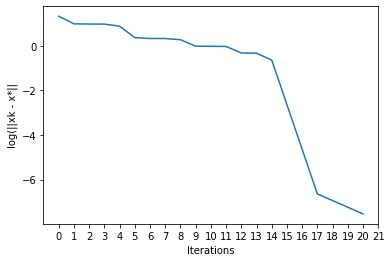

In [20]:
pl = []
for i in range(k+1):
  pl.append(np.log10(np.linalg.norm(np.subtract(xl[i],x))))

kl = range(0,k+1)

plt.plot(kl,pl)
ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


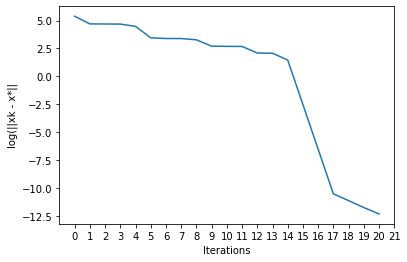

In [21]:
fl = []
for i in range(k+1):
  fl.append(np.log10(abs(evalf(xl[i])-f)))

kl = range(0,k+1)

plt.plot(kl,fl)
ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show()

In [22]:
print(n_time)
print(b_time)

0.01549165799997354
0.019970591999936005


#Ans 4:

Newton's method takes 5 iterations whereas BFGS method takes 21 iterations.

The minimum value reached by both functions is same.

Time taken by Newton's method : 0.0138 seconds

Time taken by BFGS : 0.0566 seconds

Though both the methods take very less time yet time taken by BFGS method is around 4 times the time taken by Newton's method.